In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [10]:
import numpy as np
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt


In [11]:
import os
import cv2

def load_images_and_labels(data_path):
    """
    Loads images and labels from a given dataset folder.
    """
    splits = ['train', 'valid', 'test']
    datasets = {}
    
    for split in splits:
        image_folder = os.path.join(data_path, split, "images")
        label_folder = os.path.join(data_path, split, "labels")

        if not os.path.exists(image_folder):
            print(f"Skipping {split}: {image_folder} not found.")
            continue

        datasets[split] = []
        for image_file in os.listdir(image_folder):
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                
                image_path = os.path.join(image_folder, image_file)
                label_file = os.path.splitext(image_file)[0] + ".txt"
                label_path = os.path.join(label_folder, label_file)
                
                # Load image
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Warning: Failed to load image: {image_path}")
                    continue
                
                # Load labels
                labels = []
                if os.path.exists(label_path):
                    with open(label_path, 'r') as f:
                        labels = [line.strip() for line in f.readlines()]
                else:
                    print(f"Warning: Label file not found for {image_file}")

                datasets[split].append((image_path, image, labels))
        
        print(f"Loaded {len(datasets[split])} images for {split} split.")

    return datasets

# Example usage
dataset_path = r"C:\Users\yamun\OneDrive\Desktop\AIML\archive\BoneFractureYolo8"  # Replace with your dataset path
datasets = load_images_and_labels(dataset_path)

# Access train/val/test datasets
train_dataset = datasets.get('train', [])

valid_dataset = datasets.get('valid', [])
test_dataset = datasets.get('test', [])


Loaded 3631 images for train split.
Loaded 348 images for valid split.
Loaded 169 images for test split.


Visualizing Training Dataset:


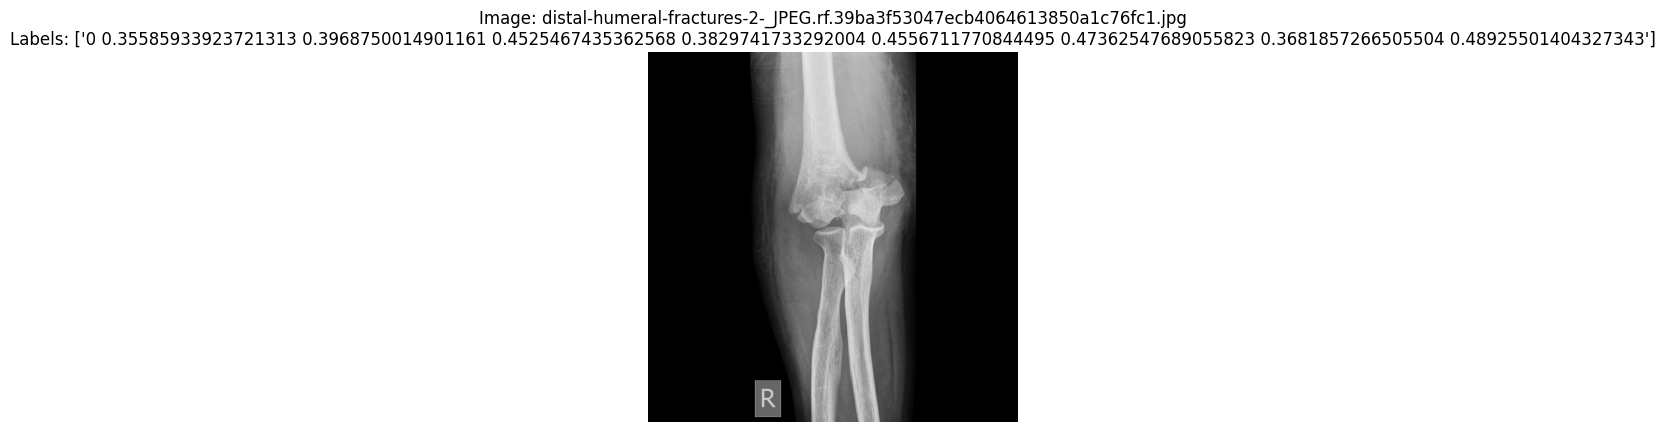

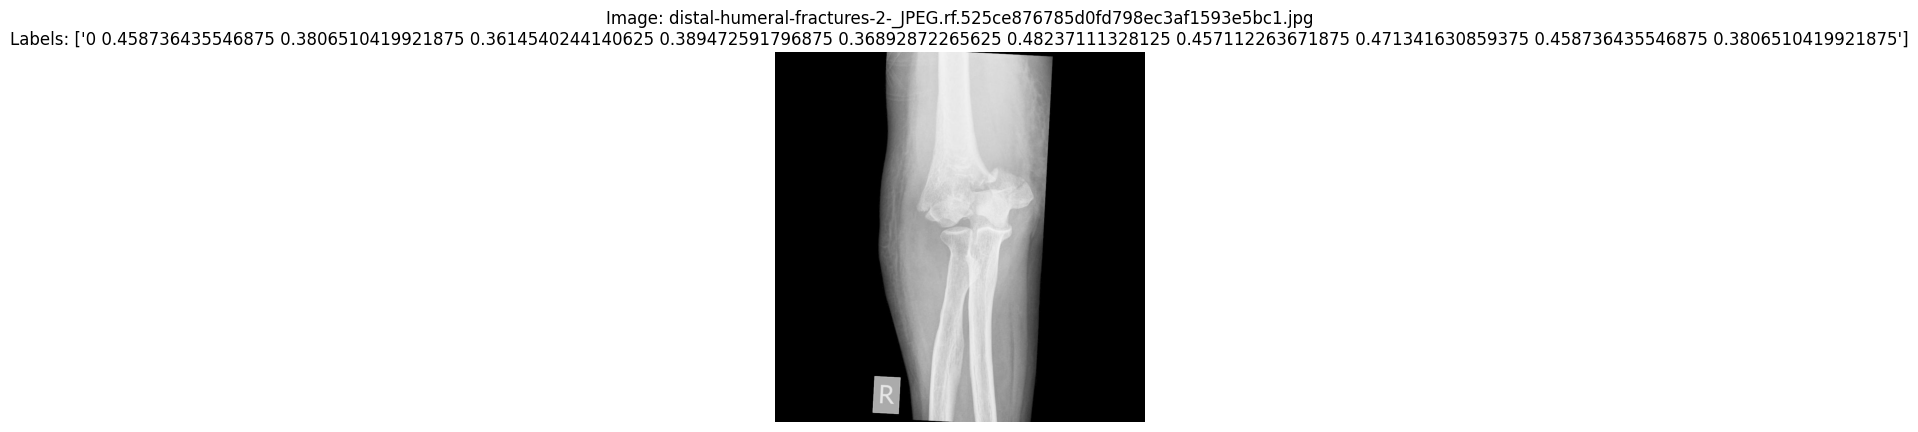

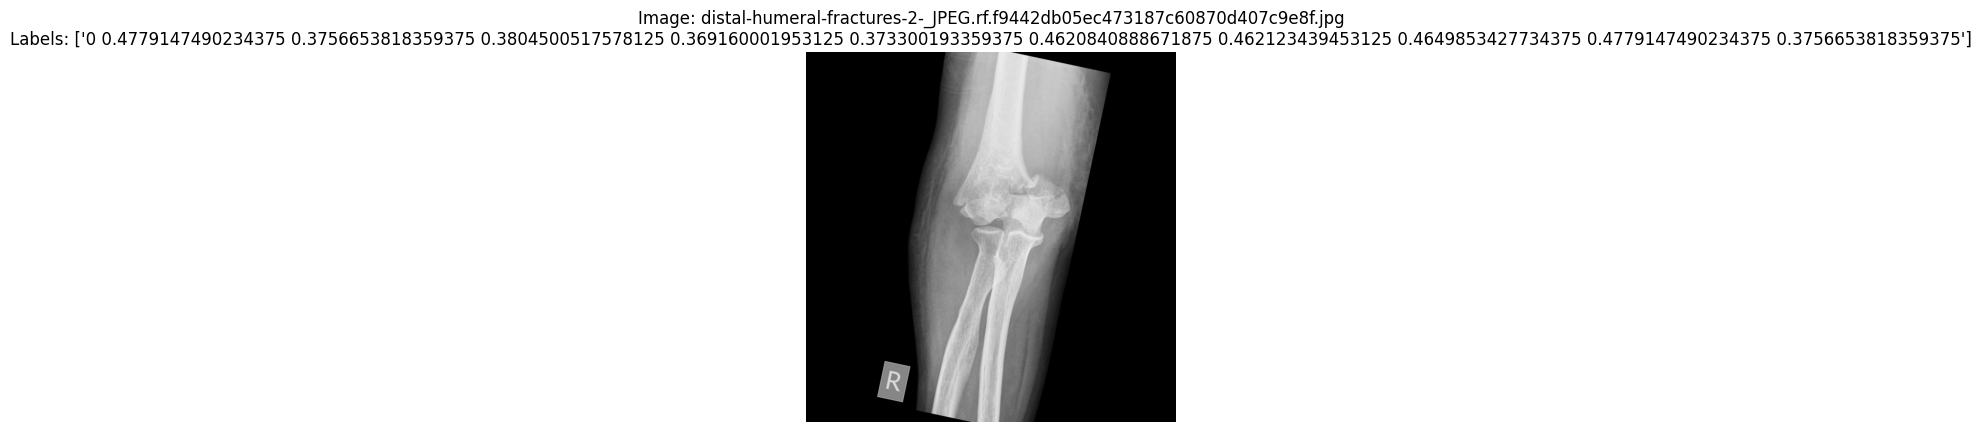

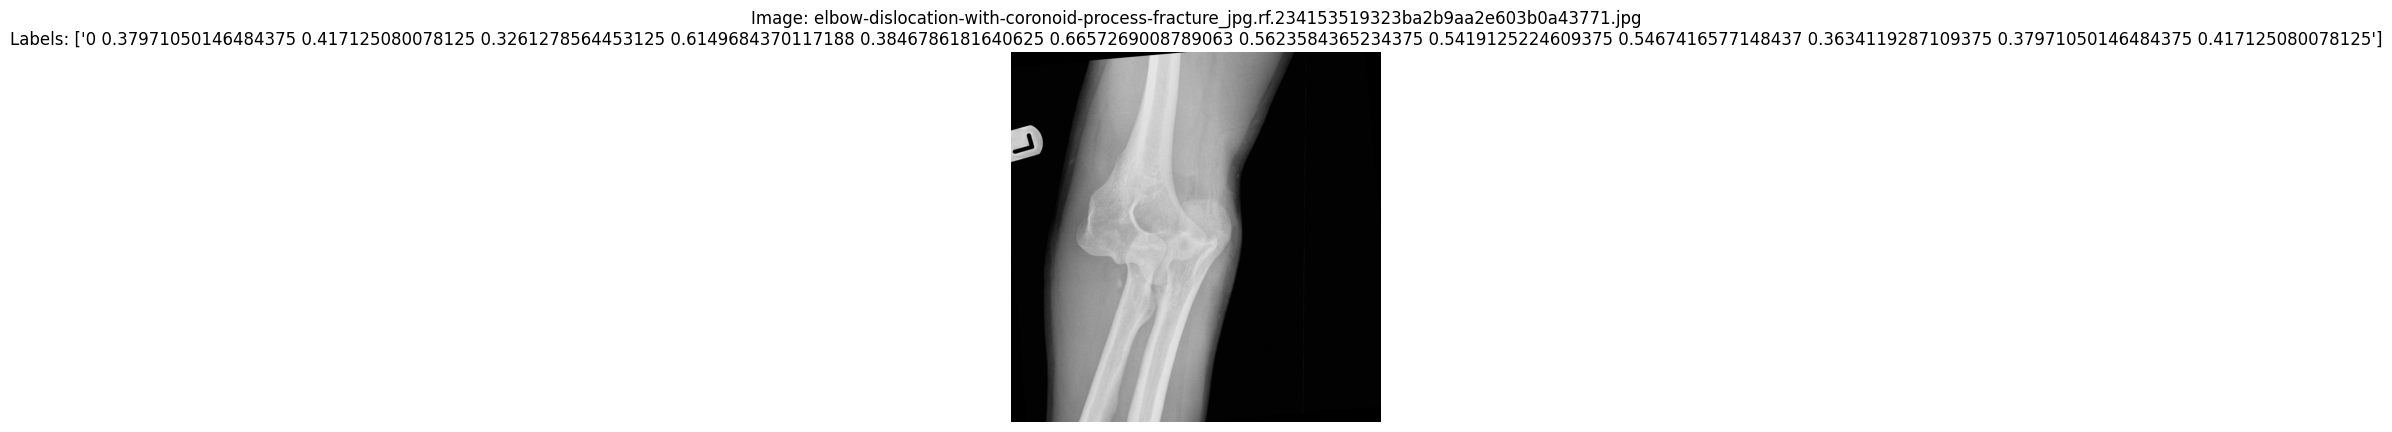

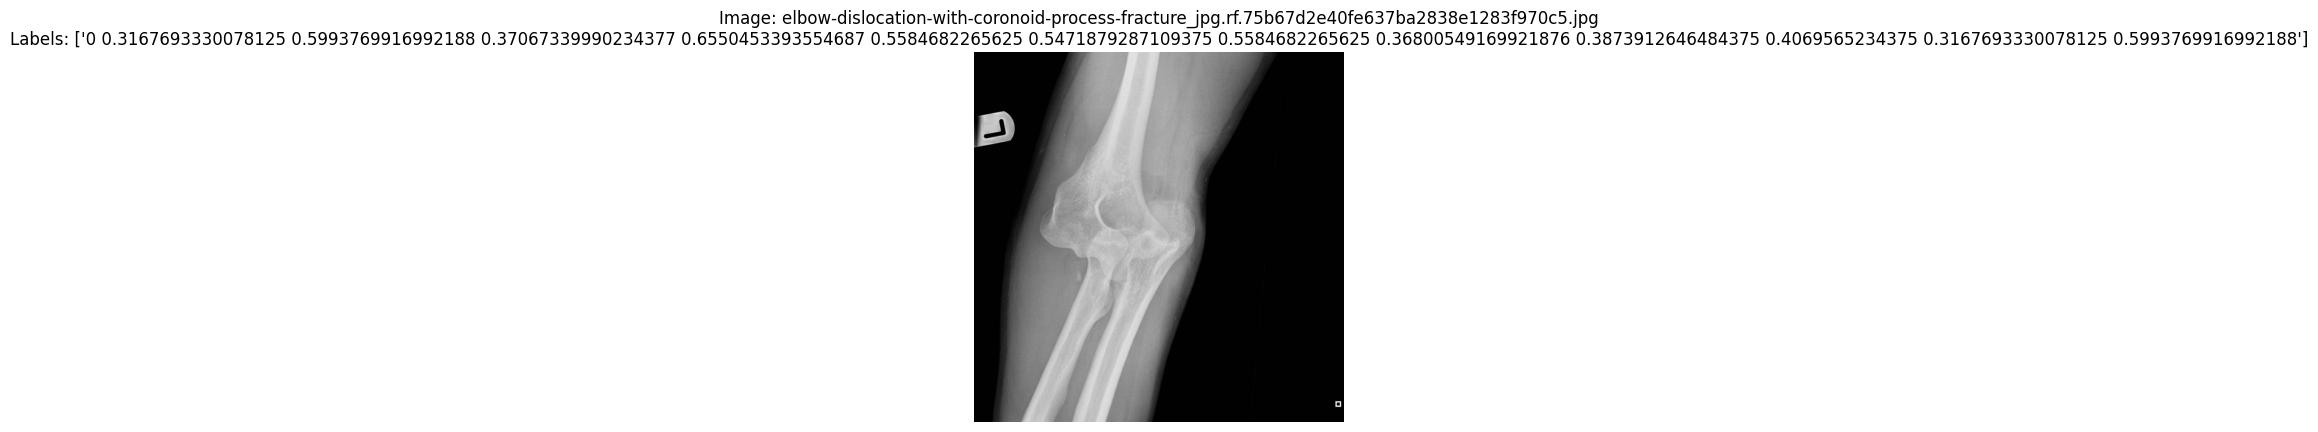

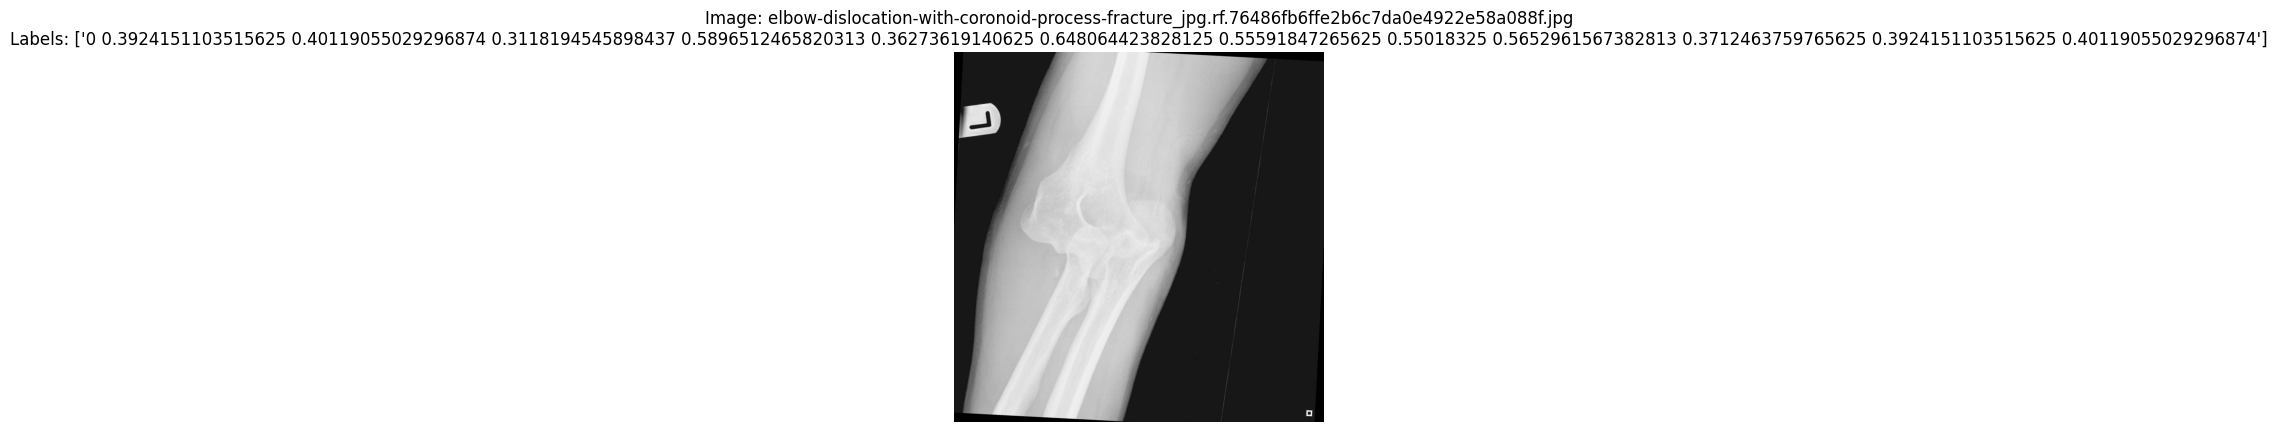

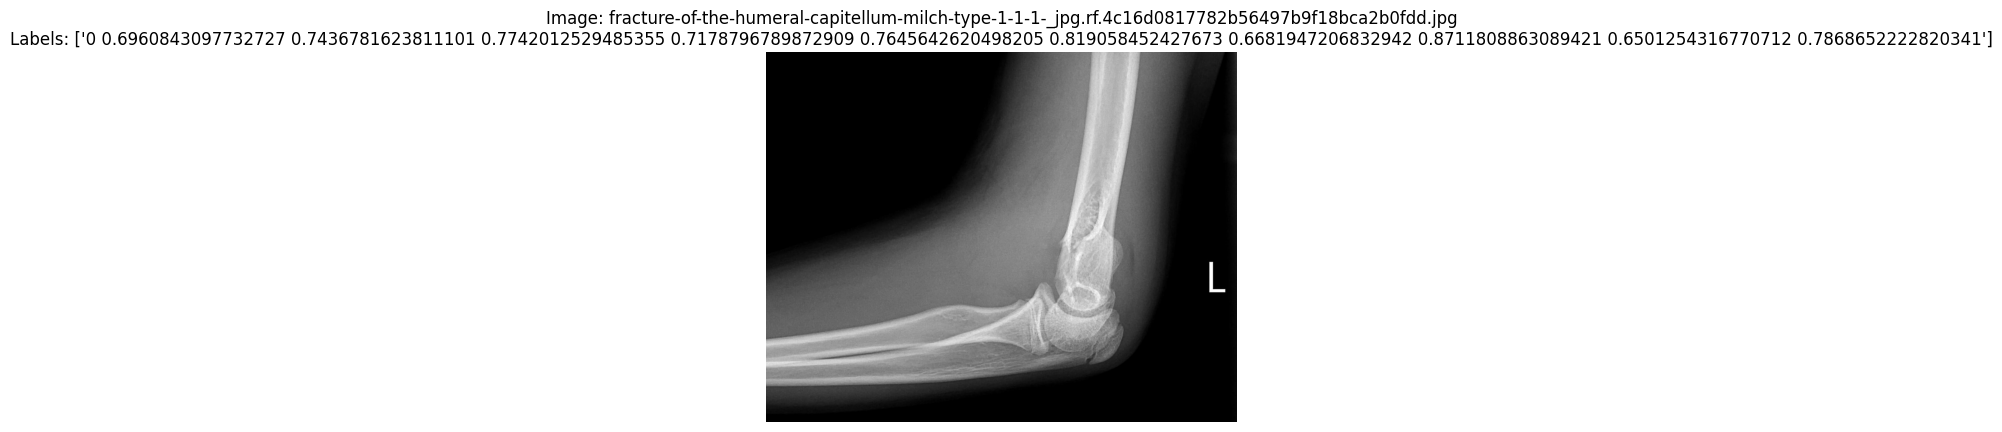

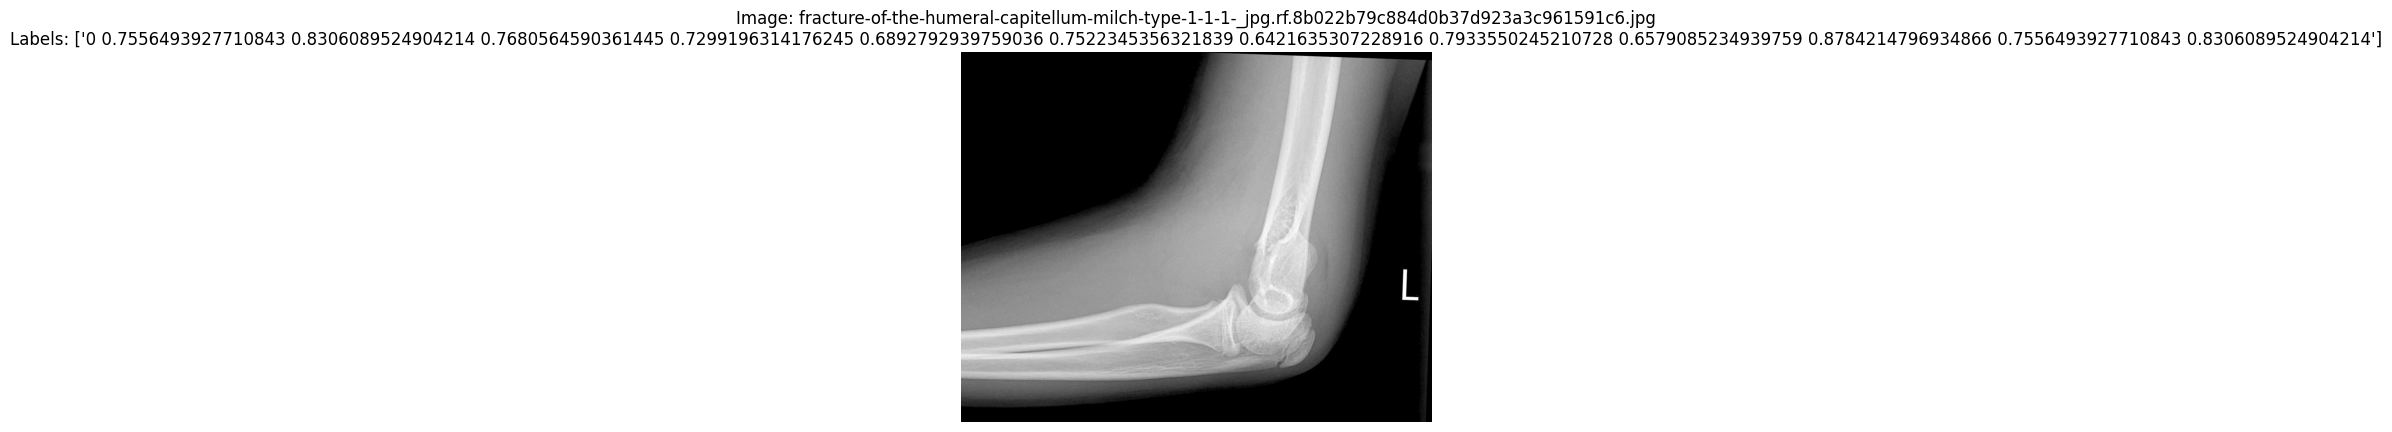

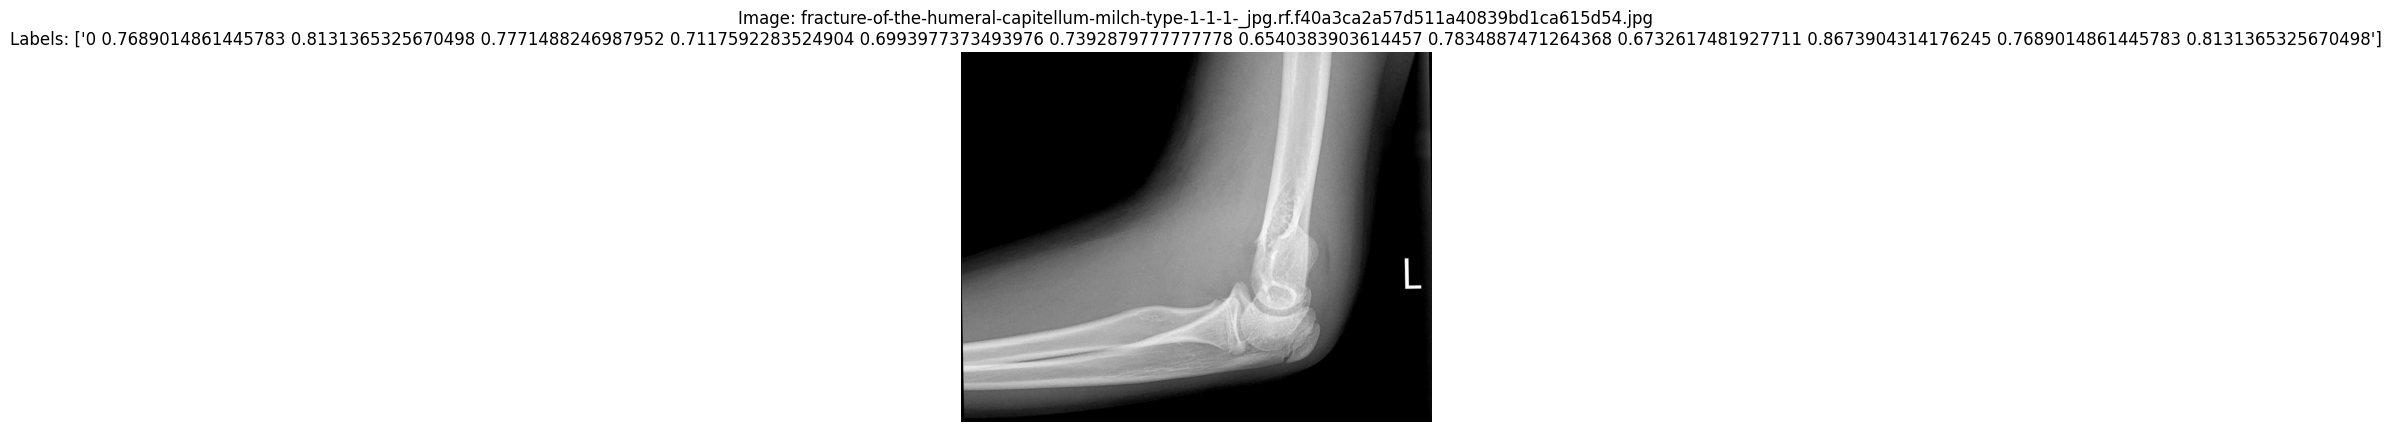

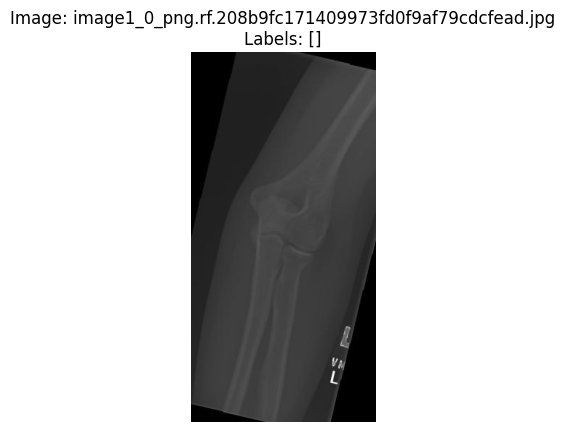

In [13]:
import matplotlib.pyplot as plt

def visualize_data(dataset, class_names=None):
    for i, (image_path, image, labels) in enumerate(dataset[:10]):  # Visualize first 5 samples
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(f"Image: {os.path.basename(image_path)}\nLabels: {labels}")
        plt.axis("off")
        plt.show()

print("Visualizing Training Dataset:")
visualize_data(train_dataset)


In [9]:
import os
from PIL import Image

input_folder = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\train\images"
output_folder = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images"

target_size = (640, 640)  


for file_name in os.listdir(input_folder):
    file_path = os.path.join(input_folder, file_name)

    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        try:
            print(f"Processing: {file_name}")
            with Image.open(file_path) as img:
                # Debug: Print original size
                print(f"Original size of {file_name}: {img.size}")

                # Resize image
                resized_img = img.resize(target_size, Image.Resampling.LANCZOS)

                # Save resized image
                resized_file_path = os.path.join(output_folder, file_name)
                resized_img.save(resized_file_path)

                # Debug: Confirm resize
                print(f"Resized and saved: {resized_file_path} with size {resized_img.size}")

        except Exception as e:
            print(f"Error resizing {file_name}: {e}")
    else:
        print(f"Skipping non-image file: {file_name}")

print("Resizing completed!")



Processing: distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg
Original size of distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg: (1024, 1024)
Resized and saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images\distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg with size (640, 640)
Processing: distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.jpg
Original size of distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.jpg: (1024, 1024)
Resized and saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images\distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.jpg with size (640, 640)
Processing: distal-humeral-fractures-2-_JPEG.rf.f9442db05ec473187c60870d407c9e8f.jpg
Original size of distal-humeral-fractures-2-_JPEG.rf.f9442db05ec473187c60870d407c9e8f.jpg: (1024, 1024)
Resized and saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFra

In [10]:
import os
from PIL import Image

# Output folder containing resized images
output_folder = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images"

# Check dimensions of each image
for file_name in os.listdir(output_folder):
    file_path = os.path.join(output_folder, file_name)

    if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        try:
            with Image.open(file_path) as img:
                print(f"{file_name}: {img.size}")  # Prints the (width, height)
        except Exception as e:
            print(f"Error checking {file_name}: {e}")


distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg: (640, 640)
distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.jpg: (640, 640)
distal-humeral-fractures-2-_JPEG.rf.f9442db05ec473187c60870d407c9e8f.jpg: (640, 640)
elbow-dislocation-with-coronoid-process-fracture_jpg.rf.234153519323ba2b9aa2e603b0a43771.jpg: (640, 640)
elbow-dislocation-with-coronoid-process-fracture_jpg.rf.75b67d2e40fe637ba2838e1283f970c5.jpg: (640, 640)
elbow-dislocation-with-coronoid-process-fracture_jpg.rf.76486fb6ffe2b6c7da0e4922e58a088f.jpg: (640, 640)
fracture-of-the-humeral-capitellum-milch-type-1-1-1-_jpg.rf.4c16d0817782b56497b9f18bca2b0fdd.jpg: (640, 640)
fracture-of-the-humeral-capitellum-milch-type-1-1-1-_jpg.rf.8b022b79c884d0b37d923a3c961591c6.jpg: (640, 640)
fracture-of-the-humeral-capitellum-milch-type-1-1-1-_jpg.rf.f40a3ca2a57d511a40839bd1ca615d54.jpg: (640, 640)
image1_0_png.rf.208b9fc171409973fd0f9af79cdcfead.jpg: (640, 640)
image1_0_png.rf.bc222874fa14e205b638e8

In [11]:
import os
import cv2

def resize_images(input_folder, output_folder, target_size=(640, 640)):
    """
    Resizes all images in the input_folder to the specified target_size
    and saves them to the output_folder.
    
    Args:
        input_folder (str): Path to the folder containing the input images.
        output_folder (str): Path to the folder where resized images will be saved.
        target_size (tuple): Target size (width, height) for resizing the images.
    """
    # Create the output folder if it does not exist
    os.makedirs(output_folder, exist_ok=True)
    
    for file_name in os.listdir(input_folder):
        if file_name.endswith(('.jpg', '.png', '.jpeg')):
            # Load the image
            img_path = os.path.join(input_folder, file_name)
            img = cv2.imread(img_path)
            
            if img is None:
                print(f"Warning: Could not read {img_path}. Skipping.")
                continue
            
            # Resize the image
            resized_img = cv2.resize(img, target_size)
            # Save the resized image
            output_path = os.path.join(output_folder, file_name)
            cv2.imwrite(output_path, resized_img)
            print(f"Resized and saved: {output_path}")

# Resize validation images
resize_images(
    input_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\valid\images",  # Replace with your validation images folder path
    output_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\images",  # Folder to save resized validation images
    target_size=(640,640)  # Target size for YOLOv8
)

# Resize test images
resize_images(
    input_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\test\images",  # Replace with your test images folder path
    output_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\images",  # Folder to save resized test images
    target_size=(640,640)  # Target size for YOLOv8
)


Resized and saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\images\coronoid-process-fracture_jpg.rf.71650459c69a9734ecd545067cf18bf4.jpg
Resized and saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\images\image1_0_png.rf.d29cab92b154a83ca5bf7e40083673a2.jpg
Resized and saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\images\image1_1000_png.rf.7eebc2918f75be5baf4c32a091ef963d.jpg
Resized and saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\images\image1_1026_png.rf.e9dc3004de762ddd0f75d8f17fb5d0f6.jpg
Resized and saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\images\image1_1029_png.rf.8f1dfb1982511a9b38867fa9444965f0.jpg
Resized and saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\images\image1_102_png.rf.c78fe3e151ea0c9779767726479e4d4d.jpg
Resized and saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\images\image1_1031_png.r

In [12]:
import os

def fix_label_format(input_folder, output_folder):
    """
    Fix label files that have multiple bounding boxes in one line.
    Splits them into individual lines in YOLO format.

    Args:
        input_folder (str): Path to the folder containing the original label files.
        output_folder (str): Path to the folder where fixed label files will be saved.
    """
    os.makedirs(output_folder, exist_ok=True)

    for label_file in os.listdir(input_folder):
        if label_file.endswith(".txt"):
            input_path = os.path.join(input_folder, label_file)
            output_path = os.path.join(output_folder, label_file)

            with open(input_path, 'r') as infile, open(output_path, 'w') as outfile:
                for line in infile:
                    data = line.strip().split()
                    class_id = data[0]  # Extract class ID
                    bbox_values = list(map(float, data[1:]))  # Extract all bounding box values

                    # Each bounding box is represented by 4 values
                    if len(bbox_values) % 4 != 0:
                        print(f"Warning: Skipping malformed line in {label_file}: {line}")
                        continue
                    
                    # Process bounding boxes
                    for i in range(0, len(bbox_values), 4):
                        center_x, center_y, width, height = bbox_values[i:i+4]
                        outfile.write(f"{class_id} {center_x} {center_y} {width} {height}\n")
            print(f"Fixed label file saved: {output_path}")

# Example: Fix labels in train, validation, and test sets
fix_label_format(
    input_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\train\labels",  # Replace with your train labels folder
    output_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\train\Label_format"   # Folder to save fixed train labels
)

fix_label_format(
    input_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\valid\labels",  # Replace with your validation labels folder
    output_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\valid\Label_format"   # Folder to save fixed validation labels
)

fix_label_format(
    input_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\test\labels",  # Replace with your test labels folder
    output_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\test\Label_format"   # Folder to save fixed test labels
)


Fixed label file saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\train\Label_format\distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.txt
Fixed label file saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\train\Label_format\distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.txt
Fixed label file saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\train\Label_format\distal-humeral-fractures-2-_JPEG.rf.f9442db05ec473187c60870d407c9e8f.txt
Fixed label file saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\train\Label_format\elbow-dislocation-with-coronoid-process-fracture_jpg.rf.234153519323ba2b9aa2e603b0a43771.txt
Fixed label file saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\train\Label_format\elbow-dislocation-with-coronoid-process-fracture_jpg.rf.75b67d2e40fe637ba2838e1283f970c5.txt
Fixed label file saved: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\train\Label_format\elbow-d

In [13]:
import os

def resize_labels(input_labels_folder, output_labels_folder, original_size, target_size=(416, 416)):
    """
    Adjusts bounding box coordinates in YOLO format labels to match resized images.
    
    Args:
        input_labels_folder (str): Path to the folder containing original label files.
        output_labels_folder (str): Path to the folder where resized labels will be saved.
        original_size (tuple): Original size of the images (width, height).
        target_size (tuple): Target size of the resized images (width, height).
    """
    # Create the output folder if it does not exist
    os.makedirs(output_labels_folder, exist_ok=True)
    
    for label_file in os.listdir(input_labels_folder):
        if label_file.endswith('.txt'):  # Process only label files
            input_path = os.path.join(input_labels_folder, label_file)
            output_path = os.path.join(output_labels_folder, label_file)
            
            with open(input_path, 'r') as f:
                lines = f.readlines()
            
            with open(output_path, 'w') as f:
                for line in lines:
                    data = line.strip().split()
                    class_id = data[0]  # Extract class ID
                    bbox = list(map(float, data[1:]))  # Extract bounding box values
                    center_x, center_y, width, height = bbox

                    # Scale bounding box coordinates to the resized dimensions
                    scale_x = target_size[0] / original_size[0]
                    scale_y = target_size[1] / original_size[1]

                    center_x *= scale_x
                    center_y *= scale_y
                    width *= scale_x
                    height *= scale_y

                    # Normalize to the resized image dimensions
                    f.write(f"{class_id} {center_x/target_size[0]} {center_y/target_size[1]} {width/target_size[0]} {height/target_size[1]}\n")
            print(f"Resized and saved label: {output_path}")

# Define original dimensions (replace with actual original dimensions of your dataset)
original_width = 1024  # Replace with original image width
original_height = 768  # Replace with original image height
original_size = (original_width, original_height)

# Resize train labels
resize_labels(
    input_labels_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\train\Label_format",  # Replace with your training labels folder
    output_labels_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels",  # Folder to save resized training labels
    original_size=original_size,  # Original image dimensions
    target_size=(640,640)  # Target size for YOLOv8
)

# Resize validation labels
resize_labels(
    input_labels_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\valid\Label_format",  # Replace with your validation labels folder
    output_labels_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels",  # Folder to save resized validation labels
    original_size=original_size,  # Original image dimensions
    target_size=(640,640)  # Target size for YOLOv8
)

# Resize test labels
resize_labels(
    input_labels_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\test\Label_format",  # Replace with your test labels folder
    output_labels_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\labels",  # Folder to save resized test labels
    original_size=original_size,  # Original image dimensions
    target_size=(640,640)  # Target size for YOLOv8
)


Resized and saved label: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels\distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.txt
Resized and saved label: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels\distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.txt
Resized and saved label: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels\distal-humeral-fractures-2-_JPEG.rf.f9442db05ec473187c60870d407c9e8f.txt
Resized and saved label: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels\elbow-dislocation-with-coronoid-process-fracture_jpg.rf.234153519323ba2b9aa2e603b0a43771.txt
Resized and saved label: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels\elbow-dislocation-with-coronoid-process-fracture_jpg.rf.75b67d2e40fe637ba2838e1283f970c5.txt
Resized and saved label: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels\elbow-disloca

In [14]:
import os
import cv2

def check_image_dimensions(folder):
    """
    Checks the dimensions of all images in the folder.

    Args:
        folder (str): Path to the folder containing images.
    """
    for img_file in os.listdir(folder):
        if img_file.endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                height, width = img.shape[:2]
                print(f"{img_file}: {width}x{height}")
            else:
                print(f"Warning: Could not open {img_file}")

# Example usage
check_image_dimensions(r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images")
check_image_dimensions(r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\images")
check_image_dimensions(r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\images")


distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg: 640x640
distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.jpg: 640x640
distal-humeral-fractures-2-_JPEG.rf.f9442db05ec473187c60870d407c9e8f.jpg: 640x640
elbow-dislocation-with-coronoid-process-fracture_jpg.rf.234153519323ba2b9aa2e603b0a43771.jpg: 640x640
elbow-dislocation-with-coronoid-process-fracture_jpg.rf.75b67d2e40fe637ba2838e1283f970c5.jpg: 640x640
elbow-dislocation-with-coronoid-process-fracture_jpg.rf.76486fb6ffe2b6c7da0e4922e58a088f.jpg: 640x640
fracture-of-the-humeral-capitellum-milch-type-1-1-1-_jpg.rf.4c16d0817782b56497b9f18bca2b0fdd.jpg: 640x640
fracture-of-the-humeral-capitellum-milch-type-1-1-1-_jpg.rf.8b022b79c884d0b37d923a3c961591c6.jpg: 640x640
fracture-of-the-humeral-capitellum-milch-type-1-1-1-_jpg.rf.f40a3ca2a57d511a40839bd1ca615d54.jpg: 640x640
image1_0_png.rf.208b9fc171409973fd0f9af79cdcfead.jpg: 640x640
image1_0_png.rf.bc222874fa14e205b638e87ddad52b9d.jpg: 640x640
image1

In [9]:
import os

def check_label_normalization(folder):
    """
    Checks if bounding box values in YOLO labels are normalized (0 to 1).

    Args:
        folder (str): Path to the folder containing label files.
    """
    for label_file in os.listdir(folder):
        if label_file.endswith('.txt'):
            file_path = os.path.join(folder, label_file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                for line_num, line in enumerate(lines, start=1):
                    data = line.strip().split()
                    if len(data) < 5:
                        print(f"Malformed line in {label_file} (line {line_num}): {line}")
                        continue
                    try:
                        class_id = int(data[0])
                        bbox = list(map(float, data[1:]))
                        if not all(0 <= v <= 1 for v in bbox):
                            print(f"Unnormalized values in {label_file} (line {line_num}): {bbox}")
                    except ValueError:
                        print(f"Invalid value in {label_file} (line {line_num}): {line}")

# Example usage
check_label_normalization(r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels")
check_label_normalization(r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels")
check_label_normalization(r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\labels")


In [15]:
import os
import cv2

def normalize_images_and_labels(input_images_folder, input_labels_folder, output_images_folder, output_labels_folder, target_size=(416, 416)):
    # Create output directories if they don't exist
    os.makedirs(output_images_folder, exist_ok=True)
    os.makedirs(output_labels_folder, exist_ok=True)
    
    # Process each image in the input folder
    for img_file in os.listdir(input_images_folder):
        if img_file.endswith(('.jpg', '.png')):
            # Read and resize the image
            img_path = os.path.join(input_images_folder, img_file)
            img = cv2.imread(img_path)
            original_height, original_width = img.shape[:2]
            resized_img = cv2.resize(img, target_size)

            # Save resized image
            cv2.imwrite(os.path.join(output_images_folder, img_file), resized_img)
            
            # Process corresponding label file
            label_file = img_file.replace('.jpg', '.txt')
            label_path = os.path.join(input_labels_folder, label_file)

            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    lines = f.readlines()

                # Normalize bounding box coordinates
                with open(os.path.join(output_labels_folder, label_file), 'w') as f:
                    for line in lines:
                        data = line.strip().split()
                        class_id = data[0]
                        bbox = list(map(float, data[1:]))
                        center_x, center_y, width, height = bbox

                        # Adjust bounding box coordinates to the resized image
                        center_x *= (target_size[0] / original_width)
                        center_y *= (target_size[1] / original_height)
                        width *= (target_size[0] / original_width)
                        height *= (target_size[1] / original_height)

                        # Write normalized coordinates to the new label file
                        f.write(f"{class_id} {center_x/target_size[0]} {center_y/target_size[1]} {width/target_size[0]} {height/target_size[1]}\n")

# Example: Normalize train, validation, and test sets
normalize_images_and_labels(
    input_images_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\train\images",
    input_labels_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\train\Label_format",
    output_images_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images",
    output_labels_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels"
)

normalize_images_and_labels(
    input_images_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\valid\images",
    input_labels_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\valid\Label_format",
    output_images_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\images",
    output_labels_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels"
)

normalize_images_and_labels(
    input_images_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\test\images",
    input_labels_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\test\Label_format",
    output_images_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\images",
    output_labels_folder=r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\labels"
)


In [8]:
import numpy
print(numpy.__version__)

2.0.2


In [11]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Pre-trained YOLOv8n model

# Train the model
model.train(data='dataset.yaml', epochs=30, imgsz=416, batch=32)

Ultralytics 8.3.49  Python-3.9.13 torch-2.5.1+cpu CPU (12th Gen Intel Core(TM) i5-1240P)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

train: Scanning C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels... 3631 images, 2970 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:02<00:00, 1696.74it/s]


train: New cache created: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels.cache


val: Scanning C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels... 348 images, 194 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<00:00, 1399.33it/s]

val: New cache created: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels.cache


Plotting labels to runs\detect\train11\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\train11
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G          0      89.97          0          0        416: 100%|██████████| 114/114 [06:12<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.18s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G          0      54.55          0          0        416: 100%|██████████| 114/114 [05:33<00:00,  2.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.96s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G          0      25.06          0          0        416: 100%|██████████| 114/114 [05:13<00:00,  2.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.95s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G          0      6.798          0          0        416: 100%|██████████| 114/114 [05:11<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.05s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G          0      1.313          0          0        416: 100%|██████████| 114/114 [06:54<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.24s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G          0      0.127          0          0        416: 100%|██████████| 114/114 [10:12<00:00,  5.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.95s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G          0    0.01238          0          0        416: 100%|██████████| 114/114 [05:15<00:00,  2.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.98s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G          0  7.581e-05          0          0        416: 100%|██████████| 114/114 [05:26<00:00,  2.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.02s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G          0  1.154e-06          0          0        416: 100%|██████████| 114/114 [06:24<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.29s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G          0  2.802e-07          0          0        416: 100%|██████████| 114/114 [06:43<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:14<00:00,  2.41s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G          0  1.506e-07          0          0        416: 100%|██████████| 114/114 [05:24<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.93s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G          0  7.947e-08          0          0        416: 100%|██████████| 114/114 [05:18<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.81s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G          0  4.601e-08          0          0        416: 100%|██████████| 114/114 [05:08<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.92s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G          0  3.765e-08          0          0        416: 100%|██████████| 114/114 [05:07<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.92s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G          0  1.673e-08          0          0        416: 100%|██████████| 114/114 [05:07<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.94s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G          0  1.255e-08          0          0        416: 100%|██████████| 114/114 [05:44<00:00,  3.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.24s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G          0  1.129e-07          0          0        416: 100%|██████████| 114/114 [06:16<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.23s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G          0  8.366e-09          0          0        416: 100%|██████████| 114/114 [05:07<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.93s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G          0   2.51e-08          0          0        416: 100%|██████████| 114/114 [05:06<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.93s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G          0          0          0          0        416: 100%|██████████| 114/114 [05:07<00:00,  2.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.94s/it]

                   all        348        362          0          0          0          0


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G          0          0          0          0        416: 100%|██████████| 114/114 [05:06<00:00,  2.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.94s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G          0  1.255e-08          0          0        416: 100%|██████████| 114/114 [05:42<00:00,  3.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.24s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G          0  8.366e-09          0          0        416: 100%|██████████| 114/114 [06:08<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.23s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G          0  4.183e-09          0          0        416: 100%|██████████| 114/114 [06:19<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.27s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G          0  4.183e-09          0          0        416: 100%|██████████| 114/114 [05:19<00:00,  2.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.96s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G          0  4.183e-09          0          0        416: 100%|██████████| 114/114 [05:02<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.93s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G          0          0          0          0        416: 100%|██████████| 114/114 [05:41<00:00,  2.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.27s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G          0          0          0          0        416: 100%|██████████| 114/114 [05:50<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.91s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G          0  4.183e-09          0          0        416: 100%|██████████| 114/114 [05:03<00:00,  2.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:11<00:00,  1.97s/it]

                   all        348        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G          0  4.183e-09          0          0        416: 100%|██████████| 114/114 [05:05<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.02s/it]

                   all        348        362          0          0          0          0



30 epochs completed in 2.971 hours.
Optimizer stripped from runs\detect\train11\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train11\weights\best.pt, 6.2MB

Validating runs\detect\train11\weights\best.pt...
Ultralytics 8.3.49  Python-3.9.13 torch-2.5.1+cpu CPU (12th Gen Intel Core(TM) i5-1240P)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.73s/it]

                   all        348        362          0          0          0          0


Speed: 0.4ms preprocess, 26.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\detect\train11


AttributeError: 'DetMetrics' object has no attribute 'curves_results'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP) of an
    object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (dict of str): A dict of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (dict of str): A dict of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    

In [12]:
result = model.predict(r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images")
print(result)  # Print raw result




WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/3631 C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images\distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg: 416x416 (no detections), 200.1ms
image 2/3631 C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images\distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.jpg: 416x416 (no detections), 167.1ms
image 3/3631 C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-tr

KeyboardInterrupt: 

In [12]:
from ultralytics import YOLO

# Step 1: Load the trained model (from the 'runs/detect' folder)
model_path =r"C:\Users\yamun\OneDrive\Desktop\AIML\runs\detect\train11\weights\best.pt"  
model = YOLO(model_path)

# Step 2: Evaluate the model on the validation/test set
results = model.val(data=r"C:\Users\yamun\OneDrive\Desktop\AIML\dataset.yaml", imgsz=416)

# Step 3: Print the Evaluation Metrics
print("Evaluation Results:")
print(f"mAP50: {results.metrics['mAP_50']:.4f}")
print(f"mAP50-95: {results.metrics['mAP_50_95']:.4f}")
print(f"Precision: {results.metrics['precision']:.4f}")
print(f"Recall: {results.metrics['recall']:.4f}")
print(f"F1 Score: {results.metrics['f1']:.4f}")
print(f"Confusion Matrix: {results.confusion_matrix}")

# Step 4: Visualize Results
results.show()  # This will display detected bounding boxes on the images

# Step 5: Save results to a directory
results.save(save_dir=r"C:\Users\yamun\OneDrive\Desktop\AIML\result_metrics")  # Optionally save evaluation results


Ultralytics 8.3.49  Python-3.9.13 torch-2.5.1+cpu CPU (12th Gen Intel Core(TM) i5-1240P)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels.cache... 348 images, 194 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:12<00:00,  1.76it/s]

                   all        348        362          0          0          0          0


Speed: 0.4ms preprocess, 32.1ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs\detect\val
Evaluation Results:


AttributeError: 'DetMetrics' object has no attribute 'metrics'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP) of an
    object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (dict of str): A dict of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (dict of str): A dict of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    

In [1]:
import os

# Define paths to train, valid, and test datasets
datasets = {
    "train": {
        "images": r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images",
        "labels": r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels"
    },
    "valid": {
        "images": r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\images",
        "labels": r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels"
    },
    "test": {
        "images": r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\images",
        "labels": r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\labels"
    }
}

# Function to clean empty label files and corresponding images
def clean_empty_labels(images_path, labels_path):
    for label_file in os.listdir(labels_path):
        label_path = os.path.join(labels_path, label_file)
        
        # Check if the label file is empty
        if os.path.getsize(label_path) == 0:  
            # Identify corresponding image file
            image_file = label_file.replace('.txt', '.jpg')  # Adjust for your image format
            image_path = os.path.join(images_path, image_file)
            
            # Remove empty label and corresponding image
            os.remove(label_path)
            if os.path.exists(image_path):
                os.remove(image_path)
                print(f"Removed empty label: {label_path} and image: {image_path}")

# Loop through train, valid, and test datasets
for split, paths in datasets.items():
    print(f"Cleaning {split} dataset...")
    clean_empty_labels(paths['images'], paths['labels'])


Cleaning train dataset...
Removed empty label: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels\distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.txt and image: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images\distal-humeral-fractures-2-_JPEG.rf.525ce876785d0fd798ec3af1593e5bc1.jpg
Removed empty label: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels\distal-humeral-fractures-2-_JPEG.rf.f9442db05ec473187c60870d407c9e8f.txt and image: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images\distal-humeral-fractures-2-_JPEG.rf.f9442db05ec473187c60870d407c9e8f.jpg
Removed empty label: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels\fracture-of-the-humeral-capitellum-milch-type-1-1-1-_jpg.rf.4c16d0817782b56497b9f18bca2b0fdd.txt and image: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images\fracture-of-the-humeral-capitellum-milch-type-1-1-1-_jpg.

In [3]:
import os

# Define paths to train, valid, and test datasets
datasets = {
    "train": {
        "images": r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images",
        "labels": r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels"
    },
    "valid": {
        "images": r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\images",
        "labels": r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels"
    },
    "test": {
        "images": r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\images",
        "labels": r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\labels"
    }
}

def validate_yolo_labels(images_path, labels_path, dataset_name):
    print(f"\nValidating {dataset_name} dataset:")
    for label_file in os.listdir(labels_path):
        if label_file.endswith('.txt'):
            label_path = os.path.join(labels_path, label_file)
            image_file = label_file.replace('.txt', '.jpg')  # Modify for your image format if needed
            image_path = os.path.join(images_path, image_file)
            
            # Check if the corresponding image exists
            if not os.path.exists(image_path):
                print(f"Error: Image file {image_path} missing for label {label_file}")
                continue
            
            # Open and validate label content
            with open(label_path, 'r') as file:
                for line_number, line in enumerate(file, 1):
                    parts = line.strip().split()
                    
                    # Check if the line has exactly 5 elements
                    if len(parts) != 5:
                        print(f"Error in {label_file} at line {line_number}: Incorrect number of values")
                        continue
                    
                    class_id, center_x, center_y, width, height = parts
                    
                    # Validate class_id
                    if not class_id.isdigit():
                        print(f"Error in {label_file} at line {line_number}: class_id is not an integer")
                    
                    # Validate coordinates
                    try:
                        center_x, center_y, width, height = map(float, [center_x, center_y, width, height])
                        if not (0 <= center_x <= 1 and 0 <= center_y <= 1 and 0 <= width <= 1 and 0 <= height <= 1):
                            print(f"Error in {label_file} at line {line_number}: Values out of range [0,1]")
                    except ValueError:
                        print(f"Error in {label_file} at line {line_number}: Coordinates are not valid floats")

# Loop through train, valid, and test datasets
for split, paths in datasets.items():
    validate_yolo_labels(paths['images'], paths['labels'], split)



Validating train dataset:

Validating valid dataset:

Validating test dataset:


In [4]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Pre-trained YOLOv8n model

# Train the model
model.train(data='dataset.yaml', epochs=30, imgsz=416, batch=32)

New https://pypi.org/project/ultralytics/8.3.50 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.49  Python-3.9.13 torch-2.5.1+cpu CPU (12th Gen Intel Core(TM) i5-1240P)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False,

train: Scanning C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels... 661 images, 0 backgrounds, 0 corrupt: 100%|██████████| 661/661 [00:00<00:00, 1772.43it/s]


train: New cache created: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels.cache


val: Scanning C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<00:00, 1714.14it/s]

val: New cache created: C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels.cache


Plotting labels to runs\detect\train12\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\train12
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G          0      100.7          0          0        416: 100%|██████████| 21/21 [00:52<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.88s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G          0      88.21          0          0        416: 100%|██████████| 21/21 [01:01<00:00,  2.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.99s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G          0      79.29          0          0        416: 100%|██████████| 21/21 [01:26<00:00,  4.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:06<00:00,  2.29s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G          0      72.41          0          0        416: 100%|██████████| 21/21 [01:23<00:00,  3.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.82s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G          0      64.63          0          0        416: 100%|██████████| 21/21 [01:18<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.73s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G          0      56.66          0          0        416: 100%|██████████| 21/21 [01:38<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.73s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G          0      49.08          0          0        416: 100%|██████████| 21/21 [01:36<00:00,  4.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.80s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G          0       42.2          0          0        416: 100%|██████████| 21/21 [01:31<00:00,  4.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.86s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G          0      36.12          0          0        416: 100%|██████████| 21/21 [01:46<00:00,  5.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.73s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G          0      30.75          0          0        416: 100%|██████████| 21/21 [00:55<00:00,  2.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.78s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G          0      26.21          0          0        416: 100%|██████████| 21/21 [00:56<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.84s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G          0      22.42          0          0        416: 100%|██████████| 21/21 [00:57<00:00,  2.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.87s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G          0      19.17          0          0        416: 100%|██████████| 21/21 [00:57<00:00,  2.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.87s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G          0      16.44          0          0        416: 100%|██████████| 21/21 [01:41<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.85s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G          0      14.17          0          0        416: 100%|██████████| 21/21 [01:39<00:00,  4.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.71s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G          0      12.27          0          0        416: 100%|██████████| 21/21 [01:46<00:00,  5.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.52s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G          0      10.67          0          0        416: 100%|██████████| 21/21 [01:31<00:00,  4.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.74s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G          0       9.37          0          0        416: 100%|██████████| 21/21 [01:43<00:00,  4.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.94s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G          0      8.286          0          0        416: 100%|██████████| 21/21 [01:45<00:00,  5.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.76s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G          0       7.38          0          0        416: 100%|██████████| 21/21 [01:43<00:00,  4.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.81s/it]

                   all        154        362          0          0          0          0


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G          0      6.625          0          0        416: 100%|██████████| 21/21 [01:12<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.97s/it]

                   all        154        362          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G          0      6.165          0          0        416:  76%|███████▌  | 16/21 [00:58<00:18,  3.65s/it]


KeyboardInterrupt: 

In [6]:
import cv2
import os
import matplotlib.pyplot as plt

def visualize_labels(image_path, label_path):
    img = cv2.imread(image_path)
    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        for line in f.readlines():
            class_id, x, y, bw, bh = map(float, line.split())
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, str(int(class_id)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Test a random image and its label
visualize_labels(r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images\image1_136_png.rf.df7573e7756f62e159106e19400926de.jpg", r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels\image1_136_png.rf.df7573e7756f62e159106e19400926de.txt")


<Figure size 640x480 with 1 Axes>

In [7]:
import matplotlib
matplotlib.use('TkAgg')  # or 'Agg', 'Qt5Agg', etc.

import matplotlib.pyplot as plt


In [8]:
import os
print("Image Exists:", os.path.exists(r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images\image1_136_png.rf.df7573e7756f62e159106e19400926de.jpg"))
print("Label Exists:", os.path.exists(r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels\image1_136_png.rf.df7573e7756f62e159106e19400926de.txt"))


Image Exists: True
Label Exists: True


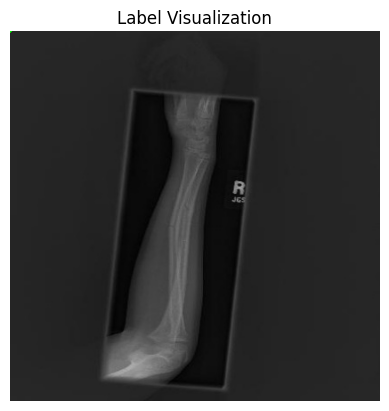

In [1]:
import cv2
import os
import matplotlib.pyplot as plt

def visualize_labels(image_path, label_path):
    if not os.path.exists(image_path) or not os.path.exists(label_path):
        print("Image or label path does not exist!")
        return

    img = cv2.imread(image_path)
    if img is None:
        print("Error loading image:", image_path)
        return
    
    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        for line in f.readlines():
            class_id, x, y, bw, bh = map(float, line.split())
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"Class {int(class_id)}", (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Label Visualization")
    plt.show()

# Test visualization
visualize_labels(r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images\image1_136_png.rf.df7573e7756f62e159106e19400926de.jpg", r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels\image1_136_png.rf.df7573e7756f62e159106e19400926de.txt")


In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Pre-trained YOLOv8n model

# Train the model
model.train(data='dataset.yaml', epochs=100, imgsz=640, batch=32)

New https://pypi.org/project/ultralytics/8.3.51 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.50  Python-3.9.13 torch-2.5.1+cpu CPU (12th Gen Intel Core(TM) i5-1240P)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

train: Scanning C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels.cache... 3631 images, 2970 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:00<?, ?it/s]
val: Scanning C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels.cache... 348 images, 194 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]


Plotting labels to runs\detect\train18\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train18
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G          0      250.7          0          0        640:   1%|          | 1/114 [00:06<12:51,  6.83s/it]

In [3]:
import os

def check_bounding_boxes(label_dir):
    errors = []

    for file in os.listdir(label_dir):
        if file.endswith('.txt'):
            file_path = os.path.join(label_dir, file)
            with open(file_path, 'r') as f:
                for line_num, line in enumerate(f.readlines(), 1):
                    try:
                        parts = line.strip().split()
                        if len(parts) != 5:
                            errors.append(f"{file} (Line {line_num}): Incorrect number of values.")
                            continue
                        
                        class_id, x, y, w, h = map(float, parts)
                        
                        if class_id < 0 or not x >= 0 <= 1 or not y >= 0 <= 1 or not w >= 0 <= 1 or not h >= 0 <= 1:
                            errors.append(f"{file} (Line {line_num}): Bounding box values out of range (0-1).")
                    except ValueError:
                        errors.append(f"{file} (Line {line_num}): Unable to parse values.")
    
    if errors:
        print("Errors found in bounding boxes:")
        for error in errors:
            print(error)
    else:
        print("All bounding boxes are correctly formatted!")

# Replace with your label directories
train_labels = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels"
valid_labels = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels"
test_labels = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\labels"

print("Checking Train Labels:")
check_bounding_boxes(train_labels)

print("\nChecking Valid Labels:")
check_bounding_boxes(valid_labels)

print("\nChecking Test Labels:")
check_bounding_boxes(test_labels)


Checking Train Labels:
All bounding boxes are correctly formatted!

Checking Valid Labels:
All bounding boxes are correctly formatted!

Checking Test Labels:
All bounding boxes are correctly formatted!


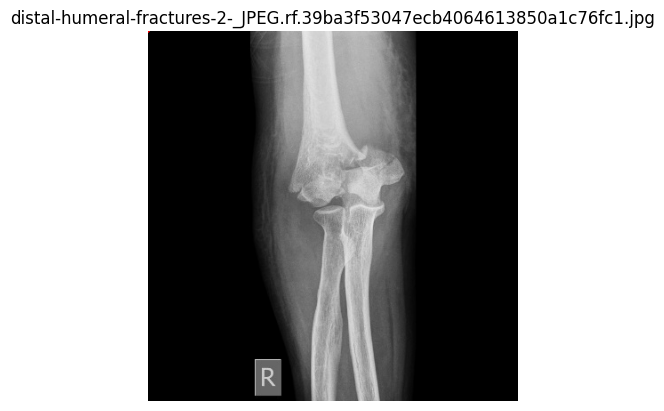

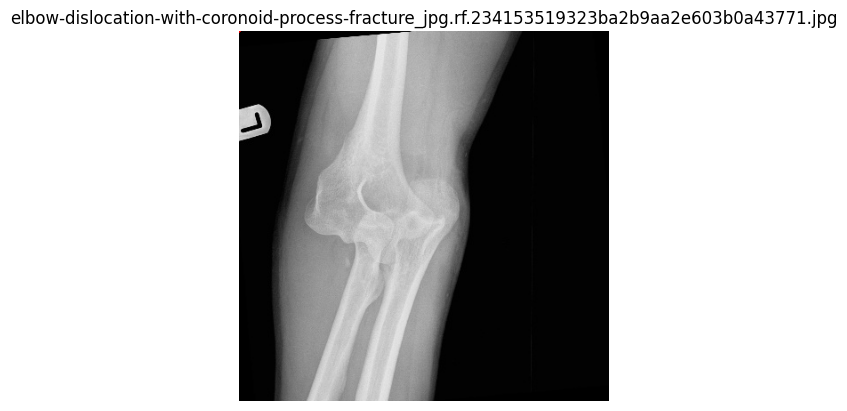

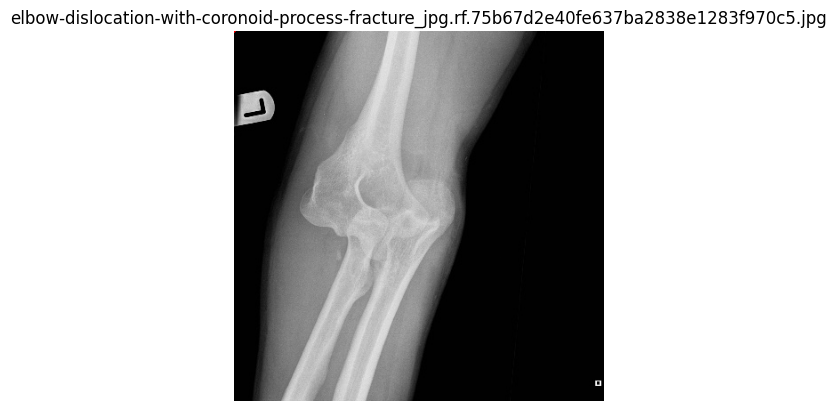

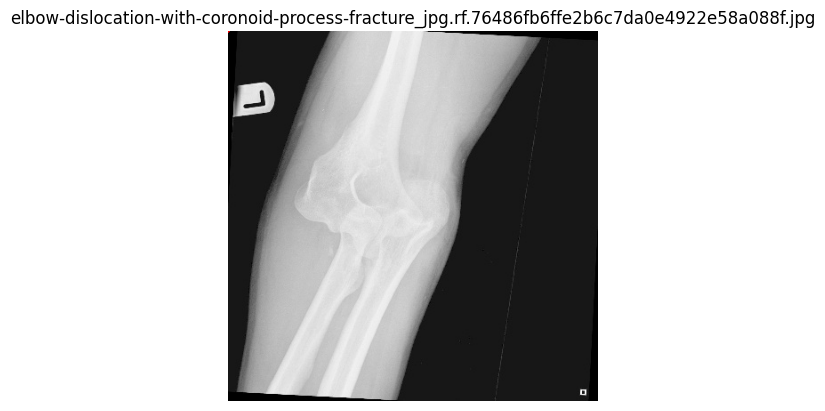

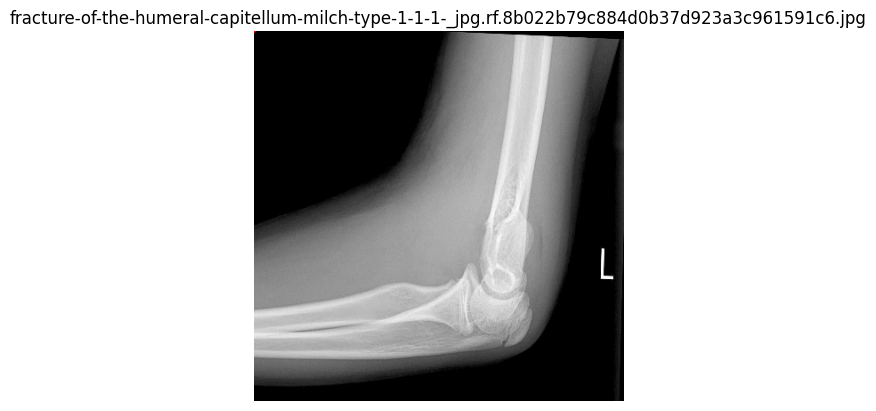

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

def visualize_bounding_boxes(image_dir, label_dir, class_names, num_images=5):
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for image_file in image_files[:num_images]:  # Visualize a few images
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, os.path.splitext(image_file)[0] + '.txt')

        # Read the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Read the label file
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f.readlines():
                    parts = line.strip().split()
                    class_id, x_center, y_center, width, height = map(float, parts)

                    # Convert normalized bbox to pixel coordinates
                    h, w, _ = image.shape
                    x1 = int((x_center - width / 2) * w)
                    y1 = int((y_center - height / 2) * h)
                    x2 = int((x_center + width / 2) * w)
                    y2 = int((y_center + height / 2) * h)

                    # Draw the bounding box
                    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(image, class_names[int(class_id)], (x1, y1 - 10), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # Display the image
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_file)
        plt.show()

# Paths to your image and label directories
train_image_dir = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images"
train_label_dir = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels"
class_names = ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']  # Update class names as per your data.yaml

visualize_bounding_boxes(train_image_dir, train_label_dir, class_names)


In [5]:
import os

def check_class_ids(label_dir, valid_classes=[0]):
    invalid_files = []
    for file in os.listdir(label_dir):
        if file.endswith('.txt'):
            with open(os.path.join(label_dir, file), 'r') as f:
                for line in f.readlines():
                    class_id = int(line.split()[0])
                    if class_id not in valid_classes:
                        invalid_files.append(file)
    return invalid_files

train_labels = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels"
invalid_files = check_class_ids(train_labels)
print("Files with invalid class IDs:", invalid_files)


Files with invalid class IDs: ['image1_0_png.rf.bc222874fa14e205b638e87ddad52b9d.txt', 'image1_0_png.rf.bc222874fa14e205b638e87ddad52b9d.txt', 'image1_1002_png.rf.c94d11a79032d6beb4ce4d876c9f7fda.txt', 'image1_1002_png.rf.c94d11a79032d6beb4ce4d876c9f7fda.txt', 'image1_1002_png.rf.c94d11a79032d6beb4ce4d876c9f7fda.txt', 'image1_1002_png.rf.c94d11a79032d6beb4ce4d876c9f7fda.txt', 'image1_1010_png.rf.65f54641e628d0952fc45df00ef5e7ff.txt', 'image1_1010_png.rf.65f54641e628d0952fc45df00ef5e7ff.txt', 'image1_1014_png.rf.b58fdd6d4425f232bf7f431b247fa2fa.txt', 'image1_1014_png.rf.b58fdd6d4425f232bf7f431b247fa2fa.txt', 'image1_1021_png.rf.aa911ca30618241dbee3e2905af62f9b.txt', 'image1_1021_png.rf.aa911ca30618241dbee3e2905af62f9b.txt', 'image1_1022_png.rf.8bb506fab5d76213a035adf3069a821c.txt', 'image1_1022_png.rf.8bb506fab5d76213a035adf3069a821c.txt', 'image1_1022_png.rf.b423a18f64684ae7c6342b0071ef46cf.txt', 'image1_1022_png.rf.b423a18f64684ae7c6342b0071ef46cf.txt', 'image1_1022_png.rf.b423a18f646

In [6]:
import os

def fix_invalid_class_ids(label_dir, valid_class_ids):
    fixed_files = 0
    invalid_files = []

    for file in os.listdir(label_dir):
        if file.endswith('.txt'):
            file_path = os.path.join(label_dir, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
            
            new_lines = []
            file_has_invalid = False

            for line in lines:
                parts = line.strip().split()
                try:
                    class_id = int(parts[0])
                    if class_id in valid_class_ids:
                        new_lines.append(line)  # Keep valid lines
                    else:
                        file_has_invalid = True
                except ValueError:
                    file_has_invalid = True  # Class ID is not an integer
            
            # Overwrite the file with only valid lines
            if new_lines:
                with open(file_path, 'w') as f:
                    f.writelines(new_lines)
                if file_has_invalid:
                    fixed_files += 1
            else:
                # If no valid lines, delete the file
                os.remove(file_path)
                invalid_files.append(file)

    print(f"Fixed {fixed_files} files with invalid class IDs.")
    if invalid_files:
        print("Removed files with no valid bounding boxes:")
        for file in invalid_files:
            print(file)

# Replace with your label directories
train_labels = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels"
valid_labels = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels"
test_labels = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\labels"

# Define valid class IDs (e.g., 0, 1)
valid_class_ids = [0, 1]

print("Fixing Train Labels:")
fix_invalid_class_ids(train_labels, valid_class_ids)

print("\nFixing Valid Labels:")
fix_invalid_class_ids(valid_labels, valid_class_ids)

print("\nFixing Test Labels:")
fix_invalid_class_ids(test_labels, valid_class_ids)


Fixing Train Labels:
Fixed 0 files with invalid class IDs.
Removed files with no valid bounding boxes:
image1_0_png.rf.bc222874fa14e205b638e87ddad52b9d.txt
image1_1002_png.rf.c94d11a79032d6beb4ce4d876c9f7fda.txt
image1_1010_png.rf.65f54641e628d0952fc45df00ef5e7ff.txt
image1_1014_png.rf.b58fdd6d4425f232bf7f431b247fa2fa.txt
image1_1021_png.rf.aa911ca30618241dbee3e2905af62f9b.txt
image1_1022_png.rf.8bb506fab5d76213a035adf3069a821c.txt
image1_1022_png.rf.b423a18f64684ae7c6342b0071ef46cf.txt
image1_1048_png.rf.21077c520036910b31583dd9c85ee747.txt
image1_1082_png.rf.faebdffda2dbbea27e773f0813c382a2.txt
image1_1097_png.rf.4e5ab3934cf7885facb1e2efd8e0d633.txt
image1_10_png.rf.5d88c6ee8fb853152b37b10a2b28732c.txt
image1_1100_png.rf.e7f9b2c0515b638bb87c095451702021.txt
image1_1131_png.rf.0219308e7abe536c2d7e294bedb415d5.txt
image1_1134_png.rf.83507446bede41f59154eab00cabcc21.txt
image1_1150_png.rf.777cc89e96217362228071c7244e0739.txt
image1_1159_png.rf.2b5e9a87d8661d5991a2043fbd672d17.txt
image1

In [7]:
import os

def remove_images_with_invalid_labels(label_dir, image_dir, valid_class_ids):
    fixed_files = 0
    invalid_files = []

    for file in os.listdir(label_dir):
        if file.endswith('.txt'):
            label_path = os.path.join(label_dir, file)
            image_path = os.path.join(image_dir, file.replace('.txt', '.jpg'))  # Adjust extension if needed
            
            with open(label_path, 'r') as f:
                lines = f.readlines()
            
            new_lines = []
            file_has_invalid = False

            for line in lines:
                parts = line.strip().split()
                try:
                    class_id = int(parts[0])
                    if class_id in valid_class_ids:
                        new_lines.append(line)
                    else:
                        file_has_invalid = True
                except ValueError:
                    file_has_invalid = True
            
            # Overwrite or delete the label file
            if new_lines:
                with open(label_path, 'w') as f:
                    f.writelines(new_lines)
                if file_has_invalid:
                    fixed_files += 1
            else:
                os.remove(label_path)  # Remove label file
                invalid_files.append(label_path)
                # Remove corresponding image
                if os.path.exists(image_path):
                    os.remove(image_path)

    print(f"Fixed {fixed_files} label files with invalid class IDs.")
    print(f"Removed {len(invalid_files)} labels and their corresponding images.")
    if invalid_files:
        print("Removed files:")
        for file in invalid_files:
            print(file)

# Replace with your paths
train_labels = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\labels"
train_images = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-train\images"
valid_labels = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\labels"
valid_images = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-valid\images"
test_labels = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\labels"
test_images = r"C:\Users\yamun\OneDrive\Desktop\AIML\BoneFractureYolo8\out-test\images"

valid_class_ids = [0, 1]  # Replace with your valid class IDs

print("Fixing Train Dataset:")
remove_images_with_invalid_labels(train_labels, train_images, valid_class_ids)

print("\nFixing Valid Dataset:")
remove_images_with_invalid_labels(valid_labels, valid_images, valid_class_ids)

print("\nFixing Test Dataset:")
remove_images_with_invalid_labels(test_labels, test_images, valid_class_ids)


Fixing Train Dataset:
Fixed 0 label files with invalid class IDs.
Removed 0 labels and their corresponding images.

Fixing Valid Dataset:
Fixed 0 label files with invalid class IDs.
Removed 0 labels and their corresponding images.

Fixing Test Dataset:
Fixed 0 label files with invalid class IDs.
Removed 0 labels and their corresponding images.


In [19]:
from ultralytics import YOLO

# Path to dataset and model configuration
data_path = r"C:\Users\yamun\OneDrive\Desktop\AIML\dataset.yaml"  # Replace with your data.yaml path
model_path = "yolov8n.pt"        # Use a pretrained model (yolov8n, yolov8s, etc.)

# Initialize the YOLOv8 model
model = YOLO(model_path)

# Training configuration
results = model.train(
    data=r"C:\Users\yamun\OneDrive\Desktop\AIML\dataset.yaml",     # Path to the dataset configuration file
    epochs=100,            # Number of training epochs
    batch=32,              # Batch size (adjust based on GPU memory)
    imgsz=640,             # Input image size (e.g., 416, 640, 1024)
    lr0=0.001,             # Initial learning rate (can be tuned)
    dropout=0.1,           # Dropout value (helps reduce overfitting)
    optimizer="SGD",       # Optimizer: 'SGD' (default) or 'Adam'
    device=0,              # Use GPU device '0' (change for multi-GPU)
    workers=4,             # Number of data-loading workers
    patience=20,           # Stop training if no improvement after 'n' epochs
    project="runs/train",  # Directory to save training results
    name="yolov8_fracture_detection",  # Name of the training run
    exist_ok=True          # Overwrite previous runs if needed
)

# Print training results summary
print("Training complete. Results saved to:", results.save_dir)


Ultralytics 8.3.49  Python-3.9.13 torch-2.5.1+cpu 


ValueError: Invalid CUDA 'device=0' requested. Use 'device=cpu' or pass valid CUDA device(s) if available, i.e. 'device=0' or 'device=0,1,2,3' for Multi-GPU.

torch.cuda.is_available(): False
torch.cuda.device_count(): 0
os.environ['CUDA_VISIBLE_DEVICES']: 0
See https://pytorch.org/get-started/locally/ for up-to-date torch install instructions if no CUDA devices are seen by torch.


In [20]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("Current Device:", torch.cuda.current_device())
print("Device Name:", torch.cuda.get_device_name(0))


GPU Available: False


AssertionError: Torch not compiled with CUDA enabled